In [3]:
import warnings

from IPython.core.display import display

warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.collections import PolyCollection as p
from matplotlib.lines import Line2D

import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import dabest

In [157]:
## Sulcal Metrics for all sulci (CoS, OTS, and MFS) 

!cd ~/Desktop/cnl/DevProso
anatomical_all = pd.read_csv('./data/anatomical_all.csv')


## By group
dp_anat = anatomical_all[anatomical_all['group'] == 'DPs']
control_anat = anatomical_all[anatomical_all['group'] == 'Controls']

## Sulcal Metrics for MFS, including sulcal length and FG LGI

mfs_all = pd.read_csv('./data/mfs.csv')

## By group
dp = mfs_all[mfs_all['group'] == 'DPs']
control = mfs_all[mfs_all['group'] == 'Controls']

# Label by group 
cos_dp = anatomical_all[(anatomical_all['group'] == 'DPs') & (anatomical_all['label'] == 'CoS')]
cos_control = anatomical_all[(anatomical_all['group'] == 'Controls') & (anatomical_all['label'] == 'CoS')]

ots_dp = anatomical_all[(anatomical_all['group'] == 'DPs') & (anatomical_all['label'] == 'OTS')]
ots_control = anatomical_all[(anatomical_all['group'] == 'Controls') & (anatomical_all['label'] == 'OTS')]


## By Sex
male = mfs_all[mfs_all['Sex'] == 'M']
female = mfs_all[mfs_all['Sex'] == 'F']

## By Sex and Group
male_dp = male[male['group'] == 'DPs']
female_dp = female[female['group'] == 'DPs']

male_control = male[male['group'] == 'Controls']
female_control = female[female['group'] == 'Controls']

## By Hemi
rh = mfs_all[mfs_all['hemi'] == 'rh']
lh = mfs_all[mfs_all['hemi'] == 'lh']

## By group
rh_dp = rh[rh['group'] == 'DPs']
rh_control = rh[rh['group'] == 'Controls']

lh_dp = lh[lh['group'] == 'DPs']
lh_control = lh[lh['group'] == 'Controls']


In [91]:
## Plotting parameters

dp_palette = {'rh' : '#1840B3', 'lh': '#84C8FF'}
control_palette = {'rh' : '#FB7904', 'lh': '#FFC481'}

custom_params_quarter = {'axes.spines.right': False,
                 'axes.spines.top':False,
                 'axes.labelsize': 14,
                 'axes.linewidth': 1.3,
                 'axes.labelweight':'bold',
                 'axes.labelpad':4,
                 'axes.titlesize':'large',
                 'xtick.labelsize':14,
                 'ytick.labelsize':14,
                 'font.weight':'bold',
                }

custom_params_single = {'axes.spines.right': False,
                 'axes.spines.top':False,
                 'axes.labelsize': 10,
                 'font.weight':'bold',
                }

sns.set_theme(style='white', rc=custom_params_quarter)


# Sulcal Length

In [161]:
## Summary stats for sulcal length

print('LENGTH MEANS AND SDs')
length_mean_sd_list = [['DP', np.mean(dp.max_path_length), np.std(dp.max_path_length)],
                       ['Control', np.mean(control.max_path_length), np.std(control.max_path_length)],
                       ['Male', np.mean(male.max_path_length), np.std(male.max_path_length)],
               ['Female', np.mean(female.max_path_length), np.std(female.max_path_length)],
               ['DP Male', np.mean(male.max_path_length), np.std(male.max_path_length)],
               ['DP Female', np.mean(female_dp.max_path_length), np.std(female_dp.max_path_length)],
               ['Control Female', np.mean(male_control.max_path_length), np.std(male_control.max_path_length)],
               ['Control Male', np.mean(male_control.max_path_length), np.std(male_control.max_path_length)]]

length_means_and_sds = pd.DataFrame(length_mean_sd_list, columns=['subset', 'mean', 'sd'])

length_means_and_sds

LENGTH MEANS AND SDs


,subset,mean,sd
0,DP,32.944562,12.336591
1,Control,37.362389,12.327905
2,Male,39.274311,11.772440
3,Female,32.902288,12.357719
4,DP Male,39.274311,11.772440
5,DP Female,31.712816,12.757177
6,Control Female,42.303318,11.360427
7,Control Male,42.303318,11.360427


The MFS was about 4mm shorter in DPs compared to NTs with nearly the same variability between groups (DP: 32.94±12.34; NTs: 37.36± 12.33).

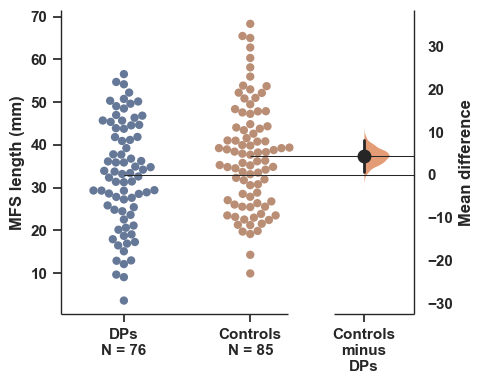

In [159]:
## Bootstrapped difference of means for MFS sulcal length x group

max_path = mfs_all[['group', 'max_path_length']]
max_path_piv = pd.pivot(max_path, values='max_path_length', columns='group')

mfs_dab = dabest.load(max_path_piv, idx=("DPs", "Controls"))
mfs_dab.mean_diff.plot(swarm_label='MFS length (mm)')
plt.show()


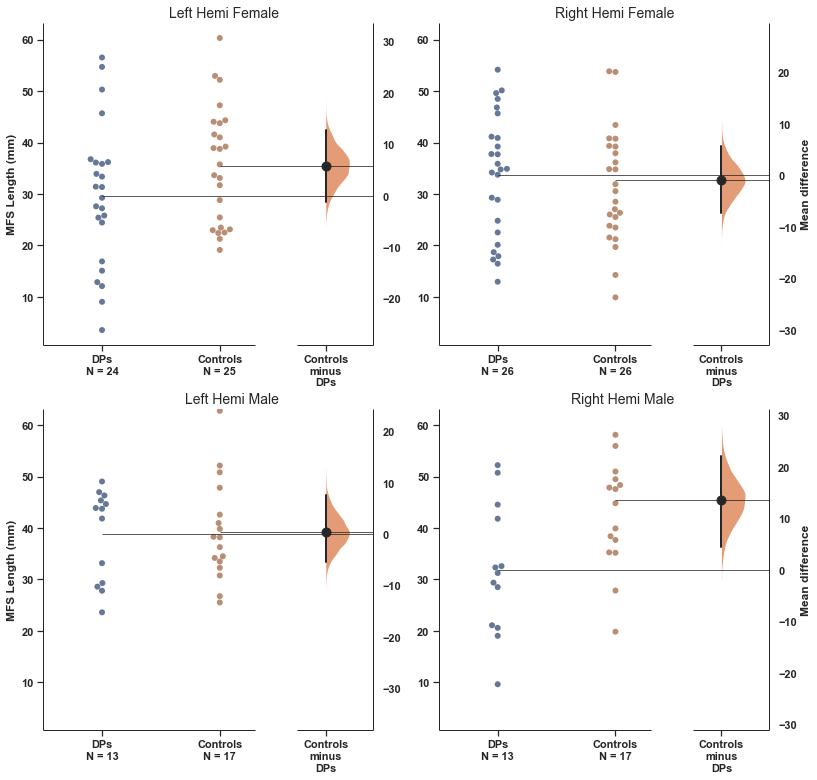

Male RH (t = 2.8887, p = 0.0073)
Female LH (t = 1.6259, p = 0.1106)


In [162]:
## Bootstrapped difference of means for MFS sulcal length x group

f, axx = plt.subplots(nrows=2, ncols=2, figsize=(13, 13), sharey=True)
sns.set()
max_path = mfs_all[['group', 'max_path_length', 'hemi', 'Sex']]
max_path_rh_male = max_path[(max_path['Sex'] == 'M') & (max_path['hemi'] == 'rh')]
max_path_lh_male = max_path[(max_path['Sex'] == 'M') & (max_path['hemi'] == 'lh')]
max_path_rh_female = max_path[(max_path['Sex'] == 'F') & (max_path['hemi'] == 'rh')]
max_path_lh_female = max_path[(max_path['Sex'] == 'F') & (max_path['hemi'] == 'lh')]

max_path_lh_female_piv = pd.pivot(max_path_lh_female, values='max_path_length', columns='group')

mfs_dab_max_path_lh_female_piv = dabest.load(max_path_lh_female_piv, idx=("DPs", "Controls"))
mfs_dab_max_path_lh_female_piv.mean_diff.plot(ax=axx.flat[0], contrast_label='')
axx.flat[0].set_ylabel('MFS Length (mm)')
axx.flat[0].set_title('Left Hemi Female', loc='right', fontsize=14)
max_path_rh_female_piv = pd.pivot(max_path_rh_female, values='max_path_length', columns='group')

mfs_dab_max_path_rh_female_piv = dabest.load(max_path_rh_female_piv, idx=("DPs", "Controls"))
mfs_dab_max_path_rh_female_piv.mean_diff.plot(ax=axx.flat[1])
axx.flat[1].set_ylabel('')
axx.flat[1].set_title('Right Hemi Female', loc='right', fontsize=14)

max_path_lh_male_piv = pd.pivot(max_path_lh_male, values='max_path_length', columns='group')

mfs_dab_max_path_lh_male_piv = dabest.load(max_path_lh_male_piv, idx=("DPs", "Controls"))
mfs_dab_max_path_lh_male_piv.mean_diff.plot(ax=axx.flat[2], contrast_label='')
axx.flat[2].set_ylabel('MFS Length (mm)')
axx.flat[2].set_title('Left Hemi Male', loc='right', fontsize=14)

max_path_rh_male_piv = pd.pivot(max_path_rh_male, values='max_path_length', columns='group')

mfs_dab_max_path_rh_male_piv = dabest.load(max_path_rh_male_piv, idx=("DPs", "Controls"))
mfs_dab_max_path_rh_male_piv.mean_diff.plot(ax=axx.flat[3])
axx.flat[3].set_ylabel('')
axx.flat[3].set_title('Right Hemi Male', loc='right', fontsize=14)
plt.show()


male_rh_t, male_rh_p = scipy.stats.ttest_ind(max_path_rh_male[max_path_rh_male['group'] == 'DPs'].max_path_length,
                      max_path_rh_male[max_path_rh_male['group'] == 'Controls'].max_path_length)


female_lh_t, female_lh_p = scipy.stats.ttest_ind(max_path_lh_female[max_path_lh_female['group'] == 'DPs'].max_path_length.drop([7,111]), #dropping hemispheres without sulcal length measurement
                      max_path_lh_female[max_path_lh_female['group'] == 'Controls'].max_path_length.drop([79]))

print('Male RH (t = {}, p = {})'.format(str(male_rh_t)[1:7], str(male_rh_p)[:6]))
print('Female LH (t = {}, p = {})'.format(str(female_lh_t)[1:7], str(female_lh_p)[:6]))




Male RH (t = 2.8887, p = 0.0073)
Female LH (t = 1.6259, p = 0.1106)


Broken down by hemisphere and participant natal gender, we see this effect is driven largely by a difference
between DP and NT Males in the right hemisphere (t=2.9, p>.001) -- with a marginal effect in the female left hemipshere (t=1.6, p=.11).

In [160]:
## ANOVA for MFS length
path_length_model = smf.ols('max_path_length ~ C(group) * C(hemi) * C(Sex)', data=mfs_all).fit()
path_length_anova_groups = sm.stats.anova_lm(path_length_model, typ=2)
path_length_anova_groups



,sum_sq,df,F,PR(>F)
C(group),661.250437,1.0,4.609451,0.033372
C(hemi),9.946623,1.0,0.069336,0.792660
C(Sex),1407.896785,1.0,9.814181,0.002076
C(group):C(hemi),2.802512,1.0,0.019536,0.889025
C(group):C(Sex),199.993529,1.0,1.394117,0.239543
C(hemi):C(Sex),0.142686,1.0,0.000995,0.974882
C(group):C(hemi):C(Sex),917.988159,1.0,6.399121,0.012430
Residual,21948.668048,153.0,NaN,NaN


A 2-way ANOVA (above) predicting sulcal length with group, hemisphere, and particpant natal gender as factors revealed a main effect of experimental group (F(1, 153)=4.61, p<.04).

In [11]:
## ANOVA predicting CFMT x length + covariates
behavioral = smf.ols('CFMT ~ max_path_length*C(Sex)*Age', data=mfs_all).fit()
behavioral_anova = sm.stats.anova_lm(behavioral, typ=2)
behavioral_anova

,sum_sq,df,F,PR(>F)
C(Sex),90.163420,1.0,0.546392,0.460943
max_path_length,741.767639,1.0,4.495129,0.035626
max_path_length:C(Sex),119.900745,1.0,0.726601,0.395337
Age,160.938028,1.0,0.975288,0.324945
C(Sex):Age,1670.128535,1.0,10.121017,0.001780
max_path_length:Age,412.709695,1.0,2.501030,0.115864
max_path_length:C(Sex):Age,29.547182,1.0,0.179057,0.672787
Residual,24917.397483,151.0,NaN,NaN


In [12]:
## ANOVA predicting CFMT x length + covariates
behavioral = smf.ols('CFMT ~ max_path_length*C(Sex)*Age', data=mfs_all).fit()
behavioral_anova = sm.stats.anova_lm(behavioral, typ=2)
behavioral_anova

,sum_sq,df,F,PR(>F)
C(Sex),90.163420,1.0,0.546392,0.460943
max_path_length,741.767639,1.0,4.495129,0.035626
max_path_length:C(Sex),119.900745,1.0,0.726601,0.395337
Age,160.938028,1.0,0.975288,0.324945
C(Sex):Age,1670.128535,1.0,10.121017,0.001780
max_path_length:Age,412.709695,1.0,2.501030,0.115864
max_path_length:C(Sex):Age,29.547182,1.0,0.179057,0.672787
Residual,24917.397483,151.0,NaN,NaN


Collapsing across groups, there is a main effect of MFS length in predicting CFMT score (F=4.5, p<.04). 

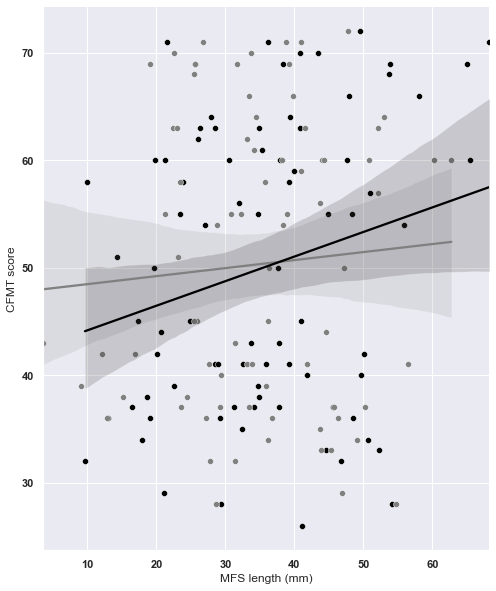

,group,r-value,p-value
0,right hemi (black),0.227102,0.041463
1,left hemi (gray),0.067203,0.558815


In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))

## Regplot separated by hemisphere
sns.scatterplot(x='max_path_length', y='CFMT', data=dp[dp['hemi']=='rh'], color='black')
sns.scatterplot(x='max_path_length', y='CFMT', data=dp[dp['hemi']=='lh'], color='grey')
sns.scatterplot(x='max_path_length', y='CFMT', data=control[control['hemi']=='rh'], color='black')
sns.scatterplot(x='max_path_length', y='CFMT', data=control[control['hemi']=='lh'], color='grey')

sns.regplot(x='max_path_length', y='CFMT', data=mfs_all[mfs_all['hemi'] == 'lh'], scatter=False, color='grey')
sns.regplot(x='max_path_length', y='CFMT', data=mfs_all[mfs_all['hemi'] == 'rh'], scatter=False, color='black')

sns.despine(top=True, right=True)
plt.xlabel('MFS length (mm)')
plt.ylabel('CFMT score')

plt.show()


# Pearson r for each subgroup
mfs_all_dropna = mfs_all[['max_path_length', 'CFMT', 'hemi']].dropna()
mfs_all_dropna_lh = mfs_all_dropna[mfs_all_dropna['hemi'] == 'lh']
mfs_all_dropna_rh = mfs_all_dropna[mfs_all_dropna['hemi'] == 'rh']


all_sub_r, all_sub_p = scipy.stats.pearsonr(mfs_all_dropna['max_path_length'], mfs_all_dropna['CFMT'])

all_sub_rh_r, all_sub_rh_p = scipy.stats.pearsonr(mfs_all_dropna_rh['max_path_length'], mfs_all_dropna_rh['CFMT'])

all_sub_lh_r, all_sub_lh_p = scipy.stats.pearsonr(mfs_all_dropna_lh['max_path_length'], mfs_all_dropna_lh['CFMT'])

pd.DataFrame([['right hemi (black)', all_sub_rh_r, all_sub_rh_p], 
                    ['left hemi (gray)', all_sub_lh_r, all_sub_lh_p]],
            columns=['group', 'r-value', 'p-value'])

Collapsing across all groups, there is a postive correlation between MFS length and CFMT score (r=.15, p=.05). This effect is largely driven by the right hemisphere (Black; r=.22, p=.04), while the left hemisphere demonstrates an insigificant relationship (Grey; r=.07, p=.56)

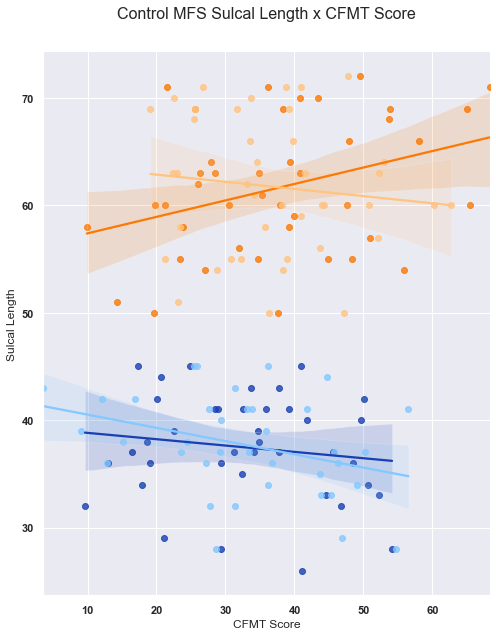

Correlation between CFMT score and MFS sulcal length (mm)


,group,r-value,p-value
0,DP LH (light blue),-0.343197,0.037565
1,DP RH (dark blue,-0.144935,0.378679
2,Control LH (light orange),-0.114160,0.477268
3,Control RH (dark orange),0.344180,0.025621


In [14]:

## Correlation lm plots for CFMT and Sulcal Length - by group and hemi
fig, ax = plt.subplots(figsize=(8,10))
sns.set_style(style='white')

sns.regplot(x='max_path_length', y='CFMT', data=dp[dp['hemi']=='rh'], color='#1840B3')#1840B3 #FB7904

sns.regplot(x='max_path_length', y='CFMT', data=dp[dp['hemi']=='lh'], color='#84C8FF')#84C8FF

sns.regplot(x='max_path_length', y='CFMT', data=control[control['hemi']=='rh'], color='#FB7904')

sns.regplot(x='max_path_length', y='CFMT', data=control[control['hemi']=='lh'], color='#FFC481')#FFC481

sns.despine(top=True, right=True)

plt.title('Control MFS Sulcal Length x CFMT Score', y=1.05, fontsize=16)
plt.xlabel('CFMT Score', fontsize=12)
plt.ylabel('Sulcal Length', fontsize=12)

plt.show()

## Summary of correlations between sulcal length and CFMT
# Dropping subjects that have NaN for MFS path length or CFMT
length_nans = mfs_all[mfs_all.max_path_length.isna()].index
cfmt_nans = mfs_all[mfs_all.CFMT.isna()].index

lh_dp_cfmt = scipy.stats.pearsonr(mfs_all[(mfs_all.group == 'DPs') & (mfs_all.hemi == 'lh')].max_path_length.drop(index=[7, 111]), 
                                  mfs_all[(mfs_all.group == 'DPs') & (mfs_all.hemi == 'lh')].CFMT.drop(index=[7, 111]))
rh_dp_cfmt = scipy.stats.pearsonr(mfs_all[(mfs_all.group == 'DPs') & (mfs_all.hemi == 'rh')].max_path_length, 
                                  mfs_all[(mfs_all.group == 'DPs') & (mfs_all.hemi == 'rh')].CFMT)
lh_control_cfmt = scipy.stats.pearsonr(mfs_all[(mfs_all.group == 'Controls') & (mfs_all.hemi == 'lh')].max_path_length.drop(index=[13, 79]), 
                                  mfs_all[(mfs_all.group == 'Controls') & (mfs_all.hemi == 'lh')].CFMT.drop(index=[13, 79]))
rh_control_cfmt = scipy.stats.pearsonr(mfs_all[(mfs_all.group == 'Controls') & (mfs_all.hemi == 'rh')].max_path_length.drop(index=[12]), 
                                  mfs_all[(mfs_all.group == 'Controls') & (mfs_all.hemi == 'rh')].CFMT.drop(index=[12]))

length_tests = [['DP LH (light blue)', lh_dp_cfmt[0], lh_dp_cfmt[1]], 
               ['DP RH (dark blue', rh_dp_cfmt[0], rh_dp_cfmt[1]],
               ['Control LH (light orange)', lh_control_cfmt[0], lh_control_cfmt[1]],
              ['Control RH (dark orange)', rh_control_cfmt[0], rh_control_cfmt[1]]]
length_across_group = pd.DataFrame(length_tests, columns=['group', 'r-value', 'p-value'])
print('Correlation between CFMT score and MFS sulcal length (mm)')
length_across_group

The length of the MFS in the right (Dark Orange; r=.34, p<.03), but not left (Light Orange; r=-.11, p<.48), hemisphere predicted CFMT scores in NTs. The opposite was true in DPs: the length of the MFS in the left (Light Blue; r=-.34, p<.04), but not right (Dark Blue; r=-.14, p<.38), hemisphere predicted CFMT score.


In [163]:
## Fisher's Z analysis fo comparison of correlations
from scipy.stats import norm


def diff_independent_corr(r1, r2, n1, n2):
    r1z = .5 * np.log((1 + r1) / (1 - r1))
    r2z = .5 * np.log((1 + r2) / (1 - r2))

    std_err_difference = np.sqrt(1 / (n1 - 3) + 1 /(n2 - 3))
    difference = r1z - r2z
    z = abs(difference / std_err_difference)
    p_val = (1 - norm.cdf(z)) * 2
    return [z, p_val]


print('**** FISHER TRANSFORMATION COMPARING CORRELATION COEFFICIENTS -- Control ****')
cont_fisher = diff_independent_corr(lh_control_cfmt[0], rh_control_cfmt[0],(len(lh_control) - 1), (len(rh_control) - 2)) # Subtracted subjects without length/cfmt
print('z\' =', cont_fisher[0], 'p-value=', cont_fisher[1])
print('\n')

print('**** FISHER TRANSFORMATION COMPARING CORRELATION COEFFICIENTS -- DP ****')
dp_fisher = diff_independent_corr(lh_dp_cfmt[0], rh_dp_cfmt[0], (len(lh_dp) - 2), len(rh_dp)) # Subtracted subjects without length/cfmt
print('z\' =', dp_fisher[0], 'p-value=', dp_fisher[1])




**** FISHER TRANSFORMATION COMPARING CORRELATION COEFFICIENTS -- Control ****
z' = 2.0772379155141447 p-value= 0.03777960602536856


**** FISHER TRANSFORMATION COMPARING CORRELATION COEFFICIENTS -- DP ****
z' = 0.885449201746381 p-value= 0.3759144057768653


Fisher's Z Transformation demonstrated that the differences in correlation were significant in the Control left hemisphere and the Control right hemisphere. This was **not** the case in the DP left hemisphere and right hemisphere (Control Fisher’s z=2.08, p<.04; DP Fisher’s z=.89, p=.38).

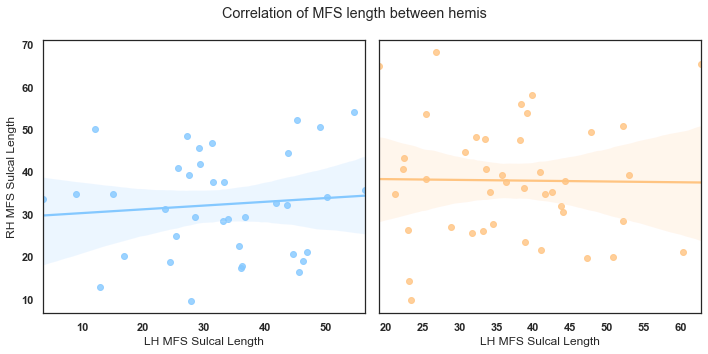

,group,r-value,p-value
0,DP,0.095412,0.574299
1,Control,-0.014328,0.928239


In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
a = sns.regplot(lh_dp['max_path_length'], y=rh_dp['max_path_length'], ax=ax.flat[0], color='#84C8FF')
ax[0].set_ylabel('RH MFS Sulcal Length')
ax[0].set_xlabel('LH MFS Sulcal Length')
b = sns.regplot(lh_control['max_path_length'], rh_control['max_path_length'], ax=ax.flat[1], color='#FFC481')
ax[1].set_ylabel('')
ax[1].set_xlabel('LH MFS Sulcal Length')
fig.suptitle('Correlation of MFS length between hemis')
plt.tight_layout()
plt.show()

# Pearson r for each group
lh_dp_nan = lh_dp[lh_dp['max_path_length'].isna()].index # Remove left hemi of subject with nan for length
rh_dp_nan = lh_dp_nan - 1 #Remove subject right hemisphere
dp_hemi_corr_r, dp_hemi_corr_p = scipy.stats.pearsonr(lh_dp['max_path_length'].drop(lh_dp_nan), rh_dp['max_path_length'].drop(rh_dp_nan))

lh_control_nan = lh_control[lh_control['max_path_length'].isna()].index
rh_control_nan = lh_control_nan - 1
control_hemi_corr_r, control_hemi_corr_p =scipy.stats.pearsonr(lh_control['max_path_length'].drop(lh_control_nan), rh_control['max_path_length'].drop(rh_control_nan))

pd.DataFrame(data=[['DP', dp_hemi_corr_r, dp_hemi_corr_p],
                ['Control', control_hemi_corr_r, control_hemi_corr_p]],
                columns=['group', 'r-value', 'p-value'])





There is no correlation between LH and RH MFS length for either DPs or controls (.1 > r > -.2, p >.57).

# Sulcal Depth

In [17]:
## Summary statistics for sulcal depth
print('MFS SULCAL DEPTH (mm) - Summary')
depth_mean_sd_list = [['Male', np.mean(male.sulcal_depth_mean_pct), np.std(male.sulcal_depth_mean_pct)],
               ['Female', np.mean(female.sulcal_depth_mean_pct), np.std(female.sulcal_depth_mean_pct)],
               ['DP Male', np.mean(male.sulcal_depth_mean_pct), np.std(male.sulcal_depth_mean_pct)],
               ['DP Female', np.mean(female_dp.sulcal_depth_mean_pct), np.std(female_dp.sulcal_depth_mean_pct)],
               ['Control Female', np.mean(female_control.sulcal_depth_mean_pct), 
               np.std(female_control.sulcal_depth_mean_pct)],
               ['Control Male', np.mean(male_control.sulcal_depth_mean_pct), np.std(male_control.sulcal_depth_mean_pct)]]

depth_means_and_sds = pd.DataFrame(depth_mean_sd_list, columns=['subset', 'mean', 'sd'])

depth_means_and_sds

MFS SULCAL DEPTH (mm) - Summary


,subset,mean,sd
0,Male,0.047585,0.098432
1,Female,0.029287,0.076636
2,DP Male,0.047585,0.098432
3,DP Female,0.022486,0.068413
4,Control Female,0.036088,0.083505
5,Control Male,0.026171,0.094568


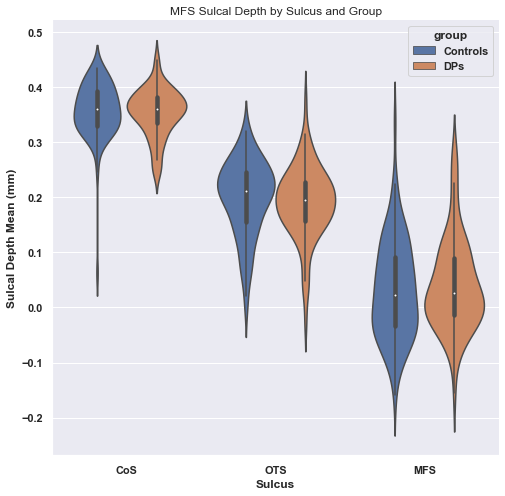

,sum_sq,df,F,PR(>F)
C(label),8.387912,2.0,898.355367,5.814988e-161
C(Sex),0.026352,1.0,5.644642,1.791044e-02
C(group),0.000005,1.0,0.001136,9.731303e-01
C(hemi),0.002875,1.0,0.615908,4.329691e-01
C(label):C(Sex),0.000819,2.0,0.087682,9.160676e-01
C(label):C(group),0.005978,2.0,0.640203,5.276462e-01
C(Sex):C(group),0.009564,1.0,2.048621,1.530116e-01
C(label):C(hemi),0.023919,2.0,2.561726,7.825325e-02
C(Sex):C(hemi),0.001821,1.0,0.390008,5.325997e-01
C(group):C(hemi),0.001286,1.0,0.275561,5.998742e-01


In [164]:

## Violin plot displaying sulcal depth across 3 VTC sulci
plt.figure(figsize=(8,8))
sns.violinplot(x='label', y='sulcal_depth_mean_pct', hue='group', data=anatomical_all)
plt.xlabel('Sulcus')
plt.ylabel('Sulcal Depth Mean (mm)')
plt.title ('MFS Sulcal Depth by Sulcus and Group')
sns.despine(top=True, right=True)
plt.show()

## ANOVA for sulcal depth
ana_depth = smf.ols('sulcal_depth_mean_pct ~ C(label)*C(Sex)*C(group)*C(hemi)', data=anatomical_all).fit()
ana_anv = sm.stats.anova_lm(ana_depth, typ=2)
ana_anv




The ANOVA on sulcal depth showed no main effect of group. There was a significant interaction between group, sulcus, and gender (F(2, 468)=3.2, p=.04)

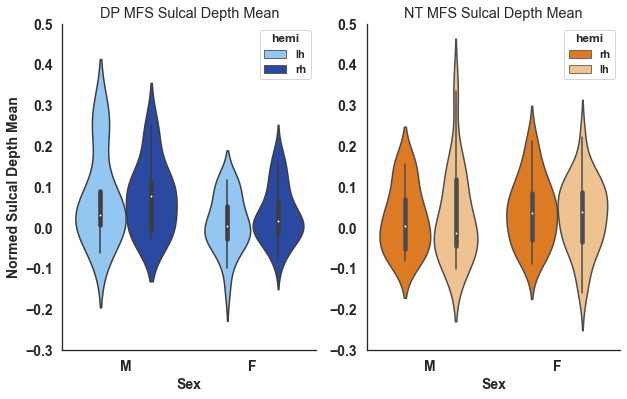

Sulcal Depth of MFS ~ Sex, Group, Hemisphere


,sum_sq,df,F,PR(>F)
C(Sex),0.013551,1.0,1.849974,0.175749
C(group),0.003442,1.0,0.469837,0.494079
C(hemi),0.003119,1.0,0.425767,0.515034
C(Sex):C(group),0.037349,1.0,5.098680,0.025331
C(Sex):C(hemi),0.004156,1.0,0.567340,0.452453
C(group):C(hemi),0.000970,1.0,0.132351,0.716499
C(Sex):C(group):C(hemi),0.000075,1.0,0.010195,0.919704
Residual,1.142733,156.0,NaN,NaN


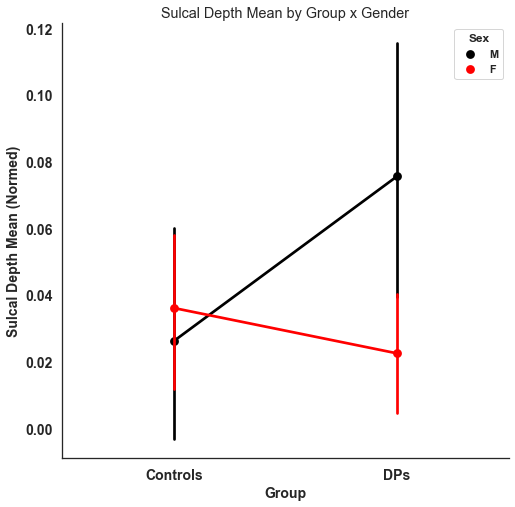

In [92]:
## Plotting MFS depth broken down by group, hemi, Sex
fig, axes = plt.subplots(1,2, figsize=[10,6], sharey=True, gridspec_kw={'width_ratios':[1,1]})

for ax in fig.axes:
    ax.tick_params(
        axis='y',
        labelleft=True
    )

## DP Subplot
sns.violinplot(x='Sex', y='sulcal_depth_mean_pct', hue='hemi', hue_order=['lh', 'rh'],
               data=mfs_all[mfs_all['group'] == 'DPs'], ax=axes[0], palette=dp_palette)
axes[0].set_ylabel('Normed Sulcal Depth Mean')
axes[0].set_ylim(-.3, .4)
axes[0].set_title('DP MFS Sulcal Depth Mean')


## Control Subplot
sns.violinplot(x='Sex', y='sulcal_depth_mean_pct', hue='hemi',hue_order=['rh', 'lh'],
               data=mfs_all[mfs_all['group'] == 'Controls'], ax=axes[1], palette=control_palette)
axes[1].set_ylabel('')
axes[1].set_ylim(-.3, .5)
axes[1].set_visible(True)
axes[1].set_title('NT MFS Sulcal Depth Mean')
sns.despine(top=True, right=True)
plt.savefig('./figures/Depth_mfs_violin.pdf', format='pdf')
plt.show()

### ANOVA on MFS sulcal depth
ana_depth_mfs = smf.ols('sulcal_depth_mean_pct ~ C(Sex)*C(group)*C(hemi)', data=anatomical_all[anatomical_all['label'] == 'MFS']).fit()
ana_anv_mfs = sm.stats.anova_lm(ana_depth_mfs, typ=2)
print('Sulcal Depth of MFS ~ Sex, Group, Hemisphere')
display(ana_anv_mfs)

 ### Interaction pointplot for sulcal depth x gender + group

plt.figure(figsize=(8,8))
sns.set_style('white')
sns.pointplot(x='group', y='sulcal_depth_mean_pct', data=mfs_all, hue='Sex', palette=['black', 'red'])
plt.xlabel('Group')
plt.ylabel('Sulcal Depth Mean (Normed)')
plt.title('Sulcal Depth Mean by Group x Gender')
sns.despine(top=True, right=True)



No significant difference in MFS depth between groups. The interaction effect noted above in all sulci is here represented in the line plot with Males in black and Females in red (F(1, 156)=5.1, p=.03). 

## Supplements

#### Cortical Thickness

Cortical Thickness analyses are included here in line with pre-registered procedure. Results were non-significant with the exception of an interaction between gender and group in MFS cortical thickness. This closely replicates our sulcal depth findings, and indeed the two measures were highly correlated (r < -.70, p<.00001>).

In [29]:
## Summary stats for cortical thickness 
print('MFS CORTICAL THICKNESS (mm) - Summary')
cortical_thickness_mean_sd_list = [['Male', np.mean(male.cortical_thickness_mean), np.std(male.cortical_thickness_mean)],
               ['Female', np.mean(female.cortical_thickness_mean), np.std(female.cortical_thickness_mean)],
               ['DP Male', np.mean(male.cortical_thickness_mean), np.std(male.cortical_thickness_mean)],
               ['DP Female', np.mean(female_dp.cortical_thickness_mean), np.std(female_dp.cortical_thickness_mean)],
               ['Control Female', np.mean(female_control.cortical_thickness_mean), 
               np.std(female_control.cortical_thickness_mean)],
               ['Control Male', np.mean(male_control.cortical_thickness_mean), np.std(male_control.cortical_thickness_mean)]]

cortical_thickness_means_and_sds = pd.DataFrame(depth_mean_sd_list, columns=['subset', 'mean', 'sd'])

cortical_thickness_means_and_sds

MFS CORTICAL THICKNESS (mm) - Summary


,subset,mean,sd
0,Male,0.047585,0.098432
1,Female,0.029287,0.076636
2,DP Male,0.047585,0.098432
3,DP Female,0.022486,0.068413
4,Control Female,0.036088,0.083505
5,Control Male,0.026171,0.094568


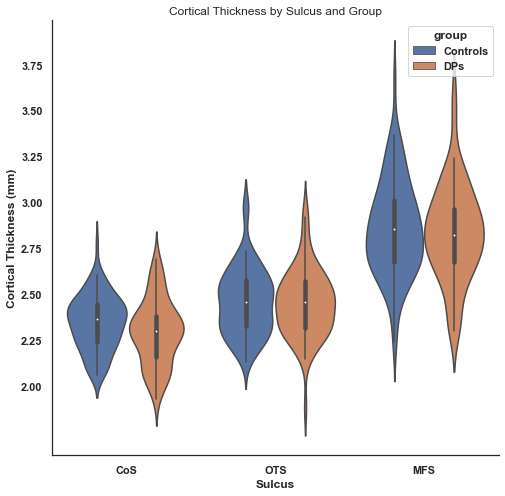

In [151]:
## Violin plot for cortical thickness

plt.figure(figsize=(8,8))
sns.violinplot(x='label', y='cortical_thickness_mean', hue='group', data=anatomical_all)
plt.xlabel('Sulcus')
plt.ylabel('Cortical Thickness (mm)')
plt.title ('Cortical Thickness by Sulcus and Group')
sns.despine(top=True, right=True)

plt.yticks(np.arange(2.00, 3.8, .25))
plt.show();


The MFS was the thickest and the CoS was the thinnest in both DPs and NTs (ANOVA with group, sulcus, hemisphere, and gender as factors revealed a main effect of sulcus: F(2, 468)=296.9, p<10e-3).

In [31]:
## ANOVA for cortical thickness
ana_depth = smf.ols('cortical_thickness_mean ~ C(label)*C(Sex)*C(group)*C(hemi)', data=anatomical_all).fit()
ana_anv = sm.stats.anova_lm(ana_depth, typ=2)
ana_anv

,sum_sq,df,F,PR(>F)
C(label),24.684097,2.0,296.901441,5.536778e-84
C(Sex),0.018049,1.0,0.434189,5.102647e-01
C(group),0.081180,1.0,1.952872,1.629398e-01
C(hemi),0.098261,1.0,2.363766,1.248579e-01
C(label):C(Sex),0.182612,2.0,2.196463,1.123408e-01
C(label):C(group),0.053395,2.0,0.642237,5.265772e-01
C(Sex):C(group),0.417469,1.0,10.042682,1.629730e-03
C(label):C(hemi),0.148365,2.0,1.784538,1.690150e-01
C(Sex):C(hemi),0.000046,1.0,0.001111,9.734296e-01
C(group):C(hemi),0.075000,1.0,1.804197,1.798569e-01


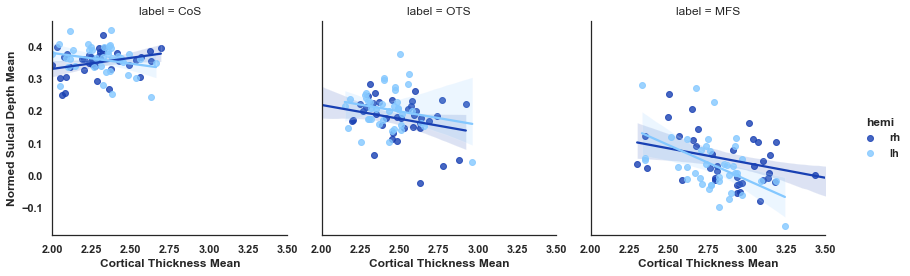

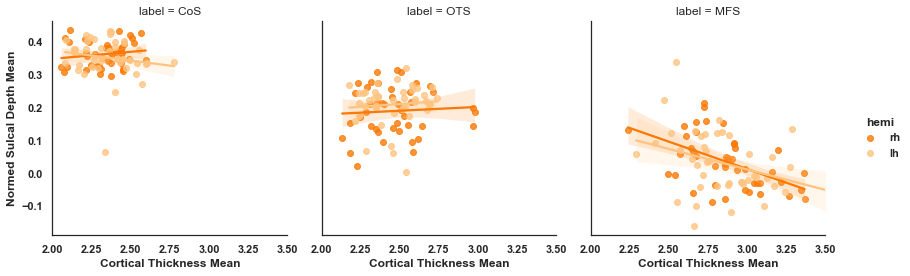

,group,sulcus,hemi,r,p
0,DP,MFS,LH,-0.481575,0.001910
1,DP,MFS,RH,-0.361434,0.023775
2,DP,OTS,LH,-0.197193,0.228876
3,DP,OTS,RH,-0.275649,0.089412
4,DP,CoS,LH,-0.244218,0.134051
5,DP,CoS,RH,0.310637,0.054264
6,NT,MFS,LH,-0.347066,0.022596
7,NT,MFS,RH,-0.514425,0.000417
8,NT,OTS,LH,0.086582,0.580903
9,NT,OTS,RH,0.065237,0.677686


In [155]:
sns.set_context("paper")
sns.set(style="white", font_scale=1)
dp_grid = sns.FacetGrid(anatomical_all[anatomical_all['group'] == 'DPs'], col='label', hue="hemi",
                        hue_order=['rh', 'lh'], 
                        palette=dp_palette, size=4)
dp_grid.map(sns.regplot, "cortical_thickness_mean", "sulcal_depth_mean_pct", data=anatomical_all);
dp_grid.add_legend()
dp_grid.set_xlabels('Cortical Thickness Mean')
dp_grid.set_ylabels('Normed Sulcal Depth Mean')
dp_grid.set(xlim=[2, 3.5])
dp_grid.tight_layout()
plt.savefig('./figures/DP_hemi_corr.pdf', format='pdf')
plt.show()

cont_grid = sns.FacetGrid(anatomical_all[anatomical_all['group'] == 'Controls'], col='label', hue="hemi",
                          hue_order=['rh', 'lh'],
                          palette=control_palette, size=4)
cont_grid.map(sns.regplot, "cortical_thickness_mean", "sulcal_depth_mean_pct", data=anatomical_all);
cont_grid.set_xlabels('Cortical Thickness Mean')
cont_grid.set_ylabels('Normed Sulcal Depth Mean')
cont_grid.add_legend()
cont_grid.set(xlim=[2, 3.5])
cont_grid.tight_layout()

plt.show()

## Correlating Sulcal Depth and Cortical Thickness for Group, Hemi, and Sulcus

## DP
### MFS
dp_mfs = mfs_all[mfs_all['group'] == 'DPs']
## lh
lh_dp_mfs = dp_mfs[dp_mfs['hemi']=='lh']
lh_dp_mfs_r, lh_dp_mfs_p = scipy.stats.pearsonr(lh_dp_mfs.cortical_thickness_mean, lh_dp_mfs.sulcal_depth_mean_pct)
lh_dp_mfs_row = ['DP', 'MFS', 'LH', lh_dp_mfs_r, lh_dp_mfs_p]
## rh
rh_dp_mfs = dp_mfs[dp_mfs['hemi']=='rh']
rh_dp_mfs_r, rh_dp_mfs_p = scipy.stats.pearsonr(rh_dp_mfs.cortical_thickness_mean, rh_dp_mfs.sulcal_depth_mean_pct)
rh_dp_mfs_row = ['DP', 'MFS', 'RH', rh_dp_mfs_r, rh_dp_mfs_p]
### OTS
dp_ots = anatomical_all[(anatomical_all['label'] == 'OTS') & (anatomical_all['group'] == 'DPs')]
## lh
lh_dp_ots = dp_ots[dp_ots['hemi'] == 'lh']
lh_dp_ots_r, lh_dp_ots_p = scipy.stats.pearsonr(lh_dp_ots.cortical_thickness_mean, lh_dp_ots.sulcal_depth_mean_pct)
lh_dp_ots_row = ['DP', 'OTS', 'LH', lh_dp_ots_r, lh_dp_ots_p]
## rh
rh_dp_ots = dp_ots[dp_ots['hemi'] == 'rh']
rh_dp_ots_r, rh_dp_ots_p = scipy.stats.pearsonr(rh_dp_ots.cortical_thickness_mean, rh_dp_ots.sulcal_depth_mean_pct)
rh_dp_ots_row = ['DP', 'OTS', 'RH', rh_dp_ots_r, rh_dp_ots_p]
### CoS
dp_cos = anatomical_all[(anatomical_all['label'] == 'CoS') & (anatomical_all['group'] == 'DPs')]
## lh
lh_dp_cos = dp_cos[dp_cos['hemi'] == 'lh']
lh_dp_cos_r, lh_dp_cos_p = scipy.stats.pearsonr(lh_dp_cos.cortical_thickness_mean, lh_dp_cos.sulcal_depth_mean_pct)
lh_dp_cos_row = ['DP', 'CoS', 'LH', lh_dp_cos_r, lh_dp_cos_p]
## rh
rh_dp_cos = dp_cos[dp_cos['hemi'] == 'rh']
rh_dp_cos_r, rh_dp_cos_p = scipy.stats.pearsonr(rh_dp_cos.cortical_thickness_mean, rh_dp_cos.sulcal_depth_mean_pct)
rh_dp_cos_row = ['DP', 'CoS', 'RH', rh_dp_cos_r, rh_dp_cos_p]

## Control
### MFS
cont_mfs = mfs_all[mfs_all['group'] == 'Controls']
## lh
lh_cont_mfs = cont_mfs[cont_mfs['hemi']=='lh']
lh_cont_mfs_r, lh_cont_mfs_p = scipy.stats.pearsonr(lh_cont_mfs.cortical_thickness_mean, lh_cont_mfs.sulcal_depth_mean_pct)
lh_cont_mfs_row = ['NT', 'MFS', 'LH', lh_cont_mfs_r, lh_cont_mfs_p]
## rh
rh_cont_mfs = cont_mfs[cont_mfs['hemi']=='rh']
rh_cont_mfs_r, rh_cont_mfs_p = scipy.stats.pearsonr(rh_cont_mfs.cortical_thickness_mean, rh_cont_mfs.sulcal_depth_mean_pct)
rh_cont_mfs_row = ['NT', 'MFS', 'RH', rh_cont_mfs_r, rh_cont_mfs_p]
### OTS
cont_ots = anatomical_all[(anatomical_all['label'] == 'OTS') & (anatomical_all['group'] == 'Controls')]
## lh
lh_cont_ots = cont_ots[cont_ots['hemi'] == 'lh']
lh_cont_ots_r, lh_cont_ots_p = scipy.stats.pearsonr(lh_cont_ots.cortical_thickness_mean, lh_cont_ots.sulcal_depth_mean_pct)
lh_cont_ots_row = ['NT', 'OTS', 'LH', lh_cont_ots_r, lh_cont_ots_p]
## rh
rh_cont_ots = cont_ots[cont_ots['hemi'] == 'rh']
rh_cont_ots_r, rh_cont_ots_p = scipy.stats.pearsonr(rh_cont_ots.cortical_thickness_mean, rh_cont_ots.sulcal_depth_mean_pct)
rh_cont_ots_row = ['NT', 'OTS', 'RH', rh_cont_ots_r, rh_cont_ots_p]
### CoS
cont_cos = anatomical_all[(anatomical_all['label'] == 'CoS') & (anatomical_all['group'] == 'Controls')]
## lh
lh_cont_cos = cont_cos[cont_cos['hemi'] == 'lh']
lh_cont_cos_r, lh_cont_cos_p = scipy.stats.pearsonr(lh_cont_cos.cortical_thickness_mean, lh_cont_cos.sulcal_depth_mean_pct)
lh_cont_cos_row = ['NT', 'CoS', 'LH', lh_cont_cos_r, lh_cont_cos_p]
## rh
rh_cont_cos = cont_cos[cont_cos['hemi'] == 'rh']## rh
rh_cont_cos_r, rh_cont_cos_p = scipy.stats.pearsonr(rh_cont_cos.cortical_thickness_mean, rh_cont_cos.sulcal_depth_mean_pct)
rh_cont_cos_row = ['NT', 'CoS', 'RH', rh_cont_cos_r, rh_cont_cos_p]

thickness_depth_data = [lh_dp_mfs_row, rh_dp_mfs_row, lh_dp_ots_row, rh_dp_ots_row, lh_dp_cos_row, rh_dp_cos_row,
                            lh_cont_mfs_row, rh_cont_mfs_row, lh_cont_ots_row, rh_cont_ots_row, lh_cont_cos_row, rh_cont_cos_row]
thickness_depth_dfs = [lh_dp_mfs, rh_dp_mfs, lh_dp_ots, rh_dp_ots, lh_dp_cos, rh_dp_cos,
                            lh_cont_mfs, rh_cont_mfs, lh_cont_ots, rh_cont_ots, lh_cont_cos, rh_cont_cos]
                            
thickness_depth_corr = pd.DataFrame(data=thickness_depth_data, columns=['group', 'sulcus', 'hemi', 'r', 'p'])
thickness_depth_corr


The correlation between cortical thickness and sulcal depth. After Bonferonni correction to (p=.004), Only the MFS (right) showed a significant anti-correlated relationship between cortical thickness and sulcal depth in the NT right hemisphere (r=-.51, p<.0005) and DP left hemisphere (r=-.48, p<.004).

In [149]:
def diff_independent_corr(r1, r2, n1, n2):
    r1z = .5 * np.log((1 + r1) / (1 - r1))
    r2z = .5 * np.log((1 + r2) / (1 - r2))

    std_err_difference = np.sqrt(1 / (n1 - 3) + 1 /(n2 - 3))
    difference = r1z - r2z
    z = abs(difference / std_err_difference)
    p_val = (1 - norm.cdf(z)) * 2
    return [z, p_val]

dp_r = [i[-1] for i in thickness_depth_data[:6]]
control_r = [i[-1] for i in thickness_depth_data[6:]]
fishers_z_depth_thick = []
sulc_hemi_names = ['LH MFS', 'RH MFS', 'LH OTS', 'RH OTS', 'LH CoS', 'RH CoS']

for i in range(6):
    z, p = diff_independent_corr(dp_r[i], control_r[i], 39, 43)
    fishers_z_depth_thick.append([sulc_hemi_names[i],z,p])


diff_in_correlation_depth_thick = pd.DataFrame(data=fishers_z_depth_thick, columns=['Hemi/Sulc', 'Fishers Z', 'p'])
diff_in_correlation_depth_thick

,Hemi/Sulc,Fishers Z,p
0,LH MFS,0.090063,0.928237
1,RH MFS,0.101691,0.919002
2,LH OTS,1.875307,0.060751
3,RH OTS,3.200094,0.001374
4,LH CoS,0.843659,0.398860
5,RH CoS,1.191605,0.233416


Comparing the difference between DPs and NTs in correlations of cortical thickness and sulcal depth,
 only the RH OTS as significantly differently correlated.

#### Other behavioral tests

Below are listed all other behavioral tests beyond CFMT as predicted by path length with age, sex, hemisphere, and group as covariates. There were non-siginificant main effects for MFS length for all tests. Conducted first in all subjects, then by DP and NT respectively.

This shows that, per our pre-registration, only CFMT was predicted by the length of the MFS.

In [ ]:
## Plot generation for tables in paper
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn

In [ ]:

dp2_behavioral = pd.read_csv('./data/dp2_behavioral.csv')

behavioral_tests=[ 'Cars',
       'CarsRT', 'Baldwomen', 'BaldwomenRT', 'Horses', 'HorsesRT',
       'CFMT', 'Famous_Faces_UKidentified', 'Famous_Faces_UKexposed',
        'Eyes_Testemotion', 'CFPTup', 'CFPTinv',
       'Films_taskup', 'CHMT', 'Sequential_idup', 'Sequential_id_inv',
       'Sequential_emup', 'Sequential_em_inv', 'WASIIQ_verbal',
       'WASIIQ_performance', 'WASIIQ_full', 'PC1', 'PC2',
       'PC3']

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val < .05 else 'black'
    return 'color: % s' % color

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="fit", height=225,
                           width_policy="auto",index_position=None, autosize_mode='fit_columns')

    export_png(data_table, filename = path)


## Print plots in notebook
behavioral_models = {}
behavioral_anovas = {}

for test in behavioral_tests:
    behavioral_models['model_{}'.format(test)] = smf.ols('{} ~ max_path_length * Age * C(Sex)'.format(test), data=dp2_behavioral).fit()
    behavioral_anovas['anova_{}'.format(test)] = sm.stats.anova_lm(behavioral_models['model_{}'.format(test)], typ=2)

#     save_df_as_image(behavioral_anovas['anova_{}'.format(test)].rename_axis('factors').round(decimals=6),
#                      './supplements/behavioral_tables/ALL_anova_{}.png'.format(test))

    print('********** ANOVA for all subjects - {} **********'.format(test))
    display(behavioral_anovas['anova_{}'.format(test)].style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['PR(>F)']]))


********** ANOVA for all subjects - Cars **********


,sum_sq,df,F,PR(>F)
C(Sex),0.017706,1.000000,4.182333,0.045168
max_path_length,0.001171,1.000000,0.276576,0.600861
max_path_length:C(Sex),0.002044,1.000000,0.482906,0.489748
Age,0.030308,1.000000,7.158778,0.009565
Age:C(Sex),0.001377,1.000000,0.325191,0.570599
max_path_length:Age,0.000006,1.000000,0.001356,0.970749
max_path_length:Age:C(Sex),0.006341,1.000000,1.497814,0.225714
Residual,0.258252,61.000000,nan,nan


********** ANOVA for all subjects - CarsRT **********


,sum_sq,df,F,PR(>F)
C(Sex),284599.104690,1.000000,2.683778,0.106524
max_path_length,478.887518,1.000000,0.004516,0.946642
max_path_length:C(Sex),100749.212065,1.000000,0.950068,0.333552
Age,530412.499778,1.000000,5.001805,0.028988
Age:C(Sex),1071406.954680,1.000000,10.103398,0.002325
max_path_length:Age,470786.949195,1.000000,4.439534,0.039236
max_path_length:Age:C(Sex),336502.238211,1.000000,3.173226,0.079833
Residual,6468697.685939,61.000000,nan,nan


********** ANOVA for all subjects - Baldwomen **********


,sum_sq,df,F,PR(>F)
C(Sex),0.010724,1.000000,1.122262,0.293609
max_path_length,0.002558,1.000000,0.267711,0.606742
max_path_length:C(Sex),0.001677,1.000000,0.175539,0.676707
Age,0.004045,1.000000,0.423279,0.517749
Age:C(Sex),0.000166,1.000000,0.017394,0.895510
max_path_length:Age,0.015576,1.000000,1.630045,0.206536
max_path_length:Age:C(Sex),0.003662,1.000000,0.383198,0.538202
Residual,0.582884,61.000000,nan,nan


********** ANOVA for all subjects - BaldwomenRT **********


,sum_sq,df,F,PR(>F)
C(Sex),4690568.266470,1.000000,6.766658,0.011639
max_path_length,119094.217495,1.000000,0.171806,0.679965
max_path_length:C(Sex),118263.233621,1.000000,0.170608,0.681021
Age,3128592.889047,1.000000,4.513338,0.037693
Age:C(Sex),5561351.638573,1.000000,8.022859,0.006251
max_path_length:Age,51681.596588,1.000000,0.074556,0.785737
max_path_length:Age:C(Sex),306901.801036,1.000000,0.442739,0.508311
Residual,42284484.719406,61.000000,nan,nan


********** ANOVA for all subjects - Horses **********


,sum_sq,df,F,PR(>F)
C(Sex),0.000002,1.000000,0.000550,0.981363
max_path_length,0.002237,1.000000,0.716218,0.400695
max_path_length:C(Sex),0.000056,1.000000,0.018080,0.893480
Age,0.000994,1.000000,0.318219,0.574748
Age:C(Sex),0.001630,1.000000,0.521896,0.472795
max_path_length:Age,0.000124,1.000000,0.039734,0.842665
max_path_length:Age:C(Sex),0.003653,1.000000,1.169507,0.283759
Residual,0.190520,61.000000,nan,nan


********** ANOVA for all subjects - HorsesRT **********


,sum_sq,df,F,PR(>F)
C(Sex),2103153.733192,1.000000,21.255003,0.000021
max_path_length,26650.660643,1.000000,0.269338,0.605654
max_path_length:C(Sex),42597.843077,1.000000,0.430505,0.514209
Age,351060.850963,1.000000,3.547910,0.064390
Age:C(Sex),1458678.508508,1.000000,14.741773,0.000296
max_path_length:Age,16530.926003,1.000000,0.167066,0.684164
max_path_length:Age:C(Sex),24490.878701,1.000000,0.247511,0.620622
Residual,6035867.425433,61.000000,nan,nan


********** ANOVA for all subjects - CFMT **********


,sum_sq,df,F,PR(>F)
C(Sex),8.621615,1.000000,0.038739,0.844620
max_path_length,0.268864,1.000000,0.001208,0.972387
max_path_length:C(Sex),41.327122,1.000000,0.185694,0.668044
Age,184.689185,1.000000,0.829858,0.365899
Age:C(Sex),722.841035,1.000000,3.247920,0.076455
max_path_length:Age,327.375866,1.000000,1.470988,0.229866
max_path_length:Age:C(Sex),77.037512,1.000000,0.346150,0.558473
Residual,13575.860232,61.000000,nan,nan


********** ANOVA for all subjects - Famous_Faces_UKidentified **********


,sum_sq,df,F,PR(>F)
C(Sex),4.507592,1.000000,0.019274,0.890042
max_path_length,22.465201,1.000000,0.096057,0.757670
max_path_length:C(Sex),267.747826,1.000000,1.144836,0.288848
Age,3.232419,1.000000,0.013821,0.906800
Age:C(Sex),357.278923,1.000000,1.527653,0.221203
max_path_length:Age,246.734979,1.000000,1.054989,0.308417
max_path_length:Age:C(Sex),311.815379,1.000000,1.333260,0.252729
Residual,14266.336730,61.000000,nan,nan


********** ANOVA for all subjects - Famous_Faces_UKexposed **********


,sum_sq,df,F,PR(>F)
C(Sex),7.258304,1.000000,0.326462,0.569849
max_path_length,5.990166,1.000000,0.269424,0.605597
max_path_length:C(Sex),49.408519,1.000000,2.222283,0.141185
Age,8.671491,1.000000,0.390024,0.534616
Age:C(Sex),1.553490,1.000000,0.069872,0.792414
max_path_length:Age,47.288511,1.000000,2.126930,0.149860
max_path_length:Age:C(Sex),29.426754,1.000000,1.323548,0.254446
Residual,1356.226893,61.000000,nan,nan


********** ANOVA for all subjects - Eyes_Testemotion **********


,sum_sq,df,F,PR(>F)
C(Sex),0.002598,1.000000,0.000304,0.986144
max_path_length,0.042783,1.000000,0.005008,0.943812
max_path_length:C(Sex),0.021165,1.000000,0.002478,0.960463
Age,7.584090,1.000000,0.887837,0.349781
Age:C(Sex),42.123875,1.000000,4.931260,0.030099
max_path_length:Age,29.167925,1.000000,3.414563,0.069473
max_path_length:Age:C(Sex),69.439175,1.000000,8.128945,0.005937
Residual,521.074986,61.000000,nan,nan


********** ANOVA for all subjects - CFPTup **********


,sum_sq,df,F,PR(>F)
C(Sex),1.896769,1.000000,0.007229,0.932523
max_path_length,643.707948,1.000000,2.453166,0.122461
max_path_length:C(Sex),11.173566,1.000000,0.042582,0.837201
Age,226.326842,1.000000,0.862530,0.356692
Age:C(Sex),374.149767,1.000000,1.425882,0.237061
max_path_length:Age,22.328159,1.000000,0.085092,0.771501
max_path_length:Age:C(Sex),35.783074,1.000000,0.136369,0.713197
Residual,16006.327278,61.000000,nan,nan


********** ANOVA for all subjects - CFPTinv **********


,sum_sq,df,F,PR(>F)
C(Sex),1042.605152,1.000000,4.637664,0.035239
max_path_length,607.455392,1.000000,2.702053,0.105364
max_path_length:C(Sex),189.665781,1.000000,0.843662,0.361969
Age,221.861093,1.000000,0.986871,0.324433
Age:C(Sex),3.839552,1.000000,0.017079,0.896454
max_path_length:Age,2.578750,1.000000,0.011471,0.915060
max_path_length:Age:C(Sex),290.286646,1.000000,1.291238,0.260264
Residual,13713.567024,61.000000,nan,nan


********** ANOVA for all subjects - Films_taskup **********


,sum_sq,df,F,PR(>F)
C(Sex),129.671232,1.000000,3.141702,0.081307
max_path_length,7.171793,1.000000,0.173760,0.678255
max_path_length:C(Sex),18.937439,1.000000,0.458820,0.500737
Age,1.963700,1.000000,0.047577,0.828063
Age:C(Sex),38.041983,1.000000,0.921689,0.340822
max_path_length:Age,14.073568,1.000000,0.340977,0.561419
max_path_length:Age:C(Sex),111.769577,1.000000,2.707977,0.104991
Residual,2517.726494,61.000000,nan,nan


********** ANOVA for all subjects - CHMT **********


,sum_sq,df,F,PR(>F)
C(Sex),61.598923,1.000000,2.168827,0.145975
max_path_length,10.005940,1.000000,0.352298,0.555010
max_path_length:C(Sex),0.270481,1.000000,0.009523,0.922580
Age,2.660828,1.000000,0.093685,0.760586
Age:C(Sex),20.997861,1.000000,0.739310,0.393249
max_path_length:Age,2.152193,1.000000,0.075776,0.784035
max_path_length:Age:C(Sex),8.286033,1.000000,0.291742,0.591073
Residual,1732.519365,61.000000,nan,nan


********** ANOVA for all subjects - Sequential_idup **********


,sum_sq,df,F,PR(>F)
C(Sex),33.164825,1.000000,0.780424,0.380480
max_path_length,43.052861,1.000000,1.013107,0.318136
max_path_length:C(Sex),86.855672,1.000000,2.043861,0.157923
Age,228.639155,1.000000,5.380266,0.023730
Age:C(Sex),2.568925,1.000000,0.060451,0.806610
max_path_length:Age,25.554116,1.000000,0.601332,0.441066
max_path_length:Age:C(Sex),1.150257,1.000000,0.027067,0.869864
Residual,2592.248729,61.000000,nan,nan


********** ANOVA for all subjects - Sequential_id_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),1.991262,1.000000,0.134641,0.714937
max_path_length,33.742267,1.000000,2.281518,0.136087
max_path_length:C(Sex),4.146049,1.000000,0.280339,0.598401
Age,452.107811,1.000000,30.569735,0.000001
Age:C(Sex),2.478255,1.000000,0.167570,0.683715
max_path_length:Age,0.307478,1.000000,0.020790,0.885827
max_path_length:Age:C(Sex),4.129281,1.000000,0.279206,0.599140
Residual,902.152934,61.000000,nan,nan


********** ANOVA for all subjects - Sequential_emup **********


,sum_sq,df,F,PR(>F)
C(Sex),1.341328,1.000000,0.078805,0.779873
max_path_length,49.399292,1.000000,2.902292,0.093544
max_path_length:C(Sex),77.621033,1.000000,4.560367,0.036743
Age,113.515131,1.000000,6.669206,0.012225
Age:C(Sex),20.538923,1.000000,1.206696,0.276304
max_path_length:Age,3.308940,1.000000,0.194406,0.660833
max_path_length:Age:C(Sex),16.591282,1.000000,0.974766,0.327395
Residual,1038.268050,61.000000,nan,nan


********** ANOVA for all subjects - Sequential_em_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),15.522569,1.000000,0.303565,0.583669
max_path_length,39.361140,1.000000,0.769760,0.383734
max_path_length:C(Sex),27.066535,1.000000,0.529323,0.469675
Age,10.090482,1.000000,0.197333,0.658454
Age:C(Sex),230.603696,1.000000,4.509766,0.037766
max_path_length:Age,14.253042,1.000000,0.278737,0.599445
max_path_length:Age:C(Sex),62.846399,1.000000,1.229046,0.271945
Residual,3119.191888,61.000000,nan,nan


********** ANOVA for all subjects - WASIIQ_verbal **********


,sum_sq,df,F,PR(>F)
C(Sex),83.019659,1.000000,0.650950,0.423127
max_path_length,437.318438,1.000000,3.428975,0.069244
max_path_length:C(Sex),179.353879,1.000000,1.406298,0.240592
Age,44.812578,1.000000,0.351371,0.555682
Age:C(Sex),114.438301,1.000000,0.897301,0.347505
max_path_length:Age,16.093462,1.000000,0.126187,0.723729
max_path_length:Age:C(Sex),48.576416,1.000000,0.380883,0.539588
Residual,7269.563349,57.000000,nan,nan


********** ANOVA for all subjects - WASIIQ_performance **********


,sum_sq,df,F,PR(>F)
C(Sex),41.167959,1.000000,0.865400,0.356155
max_path_length,73.311652,1.000000,1.541100,0.219539
max_path_length:C(Sex),41.675190,1.000000,0.876063,0.353231
Age,3.251898,1.000000,0.068359,0.794684
Age:C(Sex),16.508214,1.000000,0.347023,0.558131
max_path_length:Age,19.553487,1.000000,0.411038,0.524013
max_path_length:Age:C(Sex),74.527869,1.000000,1.566666,0.215804
Residual,2711.547073,57.000000,nan,nan


********** ANOVA for all subjects - WASIIQ_full **********


,sum_sq,df,F,PR(>F)
C(Sex),5.151921,1.000000,0.074202,0.786298
max_path_length,306.519715,1.000000,4.414764,0.040062
max_path_length:C(Sex),147.652673,1.000000,2.126623,0.150248
Age,4.747522,1.000000,0.068378,0.794656
Age:C(Sex),69.611749,1.000000,1.002609,0.320912
max_path_length:Age,0.010571,1.000000,0.000152,0.990198
max_path_length:Age:C(Sex),0.632263,1.000000,0.009106,0.924310
Residual,3957.543908,57.000000,nan,nan


********** ANOVA for all subjects - PC1 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.800175,1.000000,0.942527,0.335463
max_path_length,0.118163,1.000000,0.139185,0.710386
max_path_length:C(Sex),0.422453,1.000000,0.497608,0.483238
Age,0.435364,1.000000,0.512815,0.476655
Age:C(Sex),2.240101,1.000000,2.638617,0.109451
max_path_length:Age,0.540961,1.000000,0.637199,0.427824
max_path_length:Age:C(Sex),0.116734,1.000000,0.137501,0.712063
Residual,51.787028,61.000000,nan,nan


********** ANOVA for all subjects - PC2 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.020632,1.000000,0.021215,0.884675
max_path_length,1.858138,1.000000,1.910614,0.171936
max_path_length:C(Sex),0.710950,1.000000,0.731028,0.395896
Age,1.080760,1.000000,1.111281,0.295961
Age:C(Sex),0.003780,1.000000,0.003887,0.950490
max_path_length:Age,0.003426,1.000000,0.003522,0.952869
max_path_length:Age:C(Sex),1.208360,1.000000,1.242486,0.269365
Residual,59.324620,61.000000,nan,nan


********** ANOVA for all subjects - PC3 **********


,sum_sq,df,F,PR(>F)
C(Sex),2.285479,1.000000,2.522364,0.117413
max_path_length,0.139469,1.000000,0.153924,0.696181
max_path_length:C(Sex),0.695591,1.000000,0.767687,0.384371
Age,0.185650,1.000000,0.204892,0.652407
Age:C(Sex),5.084795,1.000000,5.611823,0.021022
max_path_length:Age,0.873925,1.000000,0.964505,0.329934
max_path_length:Age:C(Sex),3.503098,1.000000,3.866187,0.053823
Residual,55.271251,61.000000,nan,nan


In [ ]:

dp2_behavioral = pd.read_csv('./data/dp2_behavioral.csv')

behavioral_tests=[ 'Cars',
       'CarsRT', 'Baldwomen', 'BaldwomenRT', 'Horses', 'HorsesRT',
       'CFMT', 'Famous_Faces_UKidentified', 'Famous_Faces_UKexposed', 
        'Eyes_Testemotion', 'CFPTup', 'CFPTinv',
       'Films_taskup', 'CHMT', 'Sequential_idup', 'Sequential_id_inv',
       'Sequential_emup', 'Sequential_em_inv', 'WASIIQ_verbal',
       'WASIIQ_performance', 'WASIIQ_full', 'PC1', 'PC2',
       'PC3']

def color_negative_blue(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val < .05 else 'black'
    return 'color: % s' % color

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="fit", height=225,
                           width_policy="auto",index_position=None, autosize_mode='fit_columns')
    
    export_png(data_table, filename = path)

behavioral_models = {}
behavioral_anovas = {}

for test in behavioral_tests:
    behavioral_models['model_{}'.format(test)] = smf.ols('{} ~ max_path_length * Age * C(Sex)'.format(test), 
                                                         data=dp2_behavioral[dp2_behavioral['Group'] == 'DPs']).fit()
    behavioral_anovas['anova_{}'.format(test)] = sm.stats.anova_lm(behavioral_models['model_{}'.format(test)], typ=2)

#     save_df_as_image(behavioral_anovas['anova_{}'.format(test)].rename_axis('factors').round(decimals=6), 
#                      './supplements/behavioral_tables/CONTROL_anova_{}.png'.format(test))

    print('********** ANOVA for DPs - {} **********'.format(test))
    display(behavioral_anovas['anova_{}'.format(test)].style.applymap(color_negative_blue, subset=pd.IndexSlice[:, ['PR(>F)']]))
   

********** ANOVA for DPs - Cars **********


,sum_sq,df,F,PR(>F)
C(Sex),0.025823,1.000000,5.442360,0.027999
max_path_length,0.004492,1.000000,0.946697,0.339882
max_path_length:C(Sex),0.003729,1.000000,0.785967,0.383771
Age,0.005242,1.000000,1.104790,0.303272
Age:C(Sex),0.001312,1.000000,0.276417,0.603692
max_path_length:Age,0.000044,1.000000,0.009312,0.923896
max_path_length:Age:C(Sex),0.008402,1.000000,1.770705,0.195305
Residual,0.118620,25.000000,nan,nan


********** ANOVA for DPs - CarsRT **********


,sum_sq,df,F,PR(>F)
C(Sex),154598.055858,1.000000,1.161978,0.291347
max_path_length,4310.694698,1.000000,0.032400,0.858604
max_path_length:C(Sex),20415.707205,1.000000,0.153447,0.698582
Age,490507.131405,1.000000,3.686712,0.066327
Age:C(Sex),494604.907649,1.000000,3.717511,0.065277
max_path_length:Age,519421.079619,1.000000,3.904032,0.059306
max_path_length:Age:C(Sex),242121.510236,1.000000,1.819815,0.189428
Residual,3326183.136101,25.000000,nan,nan


********** ANOVA for DPs - Baldwomen **********


,sum_sq,df,F,PR(>F)
C(Sex),0.009666,1.000000,1.565269,0.222477
max_path_length,0.003642,1.000000,0.589777,0.449699
max_path_length:C(Sex),0.000591,1.000000,0.095642,0.759686
Age,0.024335,1.000000,3.940572,0.058210
Age:C(Sex),0.002265,1.000000,0.366849,0.550186
max_path_length:Age,0.005990,1.000000,0.969894,0.334143
max_path_length:Age:C(Sex),0.000008,1.000000,0.001247,0.972108
Residual,0.154388,25.000000,nan,nan


********** ANOVA for DPs - BaldwomenRT **********


,sum_sq,df,F,PR(>F)
C(Sex),4835940.293478,1.000000,4.573806,0.042420
max_path_length,657756.999117,1.000000,0.622103,0.437683
max_path_length:C(Sex),1435385.512879,1.000000,1.357580,0.254955
Age,2459841.105729,1.000000,2.326504,0.139740
Age:C(Sex),2814958.914052,1.000000,2.662373,0.115282
max_path_length:Age,20709.005991,1.000000,0.019586,0.889820
max_path_length:Age:C(Sex),402603.896694,1.000000,0.380781,0.542766
Residual,26432800.338722,25.000000,nan,nan


********** ANOVA for DPs - Horses **********


,sum_sq,df,F,PR(>F)
C(Sex),0.000690,1.000000,0.225546,0.638969
max_path_length,0.002536,1.000000,0.829437,0.371134
max_path_length:C(Sex),0.000142,1.000000,0.046537,0.830953
Age,0.000621,1.000000,0.203199,0.656037
Age:C(Sex),0.001296,1.000000,0.423920,0.520928
max_path_length:Age,0.002146,1.000000,0.701669,0.410160
max_path_length:Age:C(Sex),0.001585,1.000000,0.518483,0.478168
Residual,0.076447,25.000000,nan,nan


********** ANOVA for DPs - HorsesRT **********


,sum_sq,df,F,PR(>F)
C(Sex),999429.787580,1.000000,12.385358,0.001682
max_path_length,26095.263241,1.000000,0.323384,0.574655
max_path_length:C(Sex),261554.415422,1.000000,3.241293,0.083883
Age,261966.484605,1.000000,3.246400,0.083653
Age:C(Sex),410008.532630,1.000000,5.081000,0.033203
max_path_length:Age,48299.132328,1.000000,0.598543,0.446389
max_path_length:Age:C(Sex),17903.249388,1.000000,0.221865,0.641707
Residual,2017361.601790,25.000000,nan,nan


********** ANOVA for DPs - CFMT **********


,sum_sq,df,F,PR(>F)
C(Sex),19.603342,1.000000,1.310860,0.263082
max_path_length,112.541743,1.000000,7.525579,0.011086
max_path_length:C(Sex),7.044684,1.000000,0.471073,0.498811
Age,3.130530,1.000000,0.209336,0.651240
Age:C(Sex),22.516542,1.000000,1.505664,0.231232
max_path_length:Age,45.062435,1.000000,3.013290,0.094896
max_path_length:Age:C(Sex),0.031475,1.000000,0.002105,0.963773
Residual,373.864078,25.000000,nan,nan


********** ANOVA for DPs - Famous_Faces_UKidentified **********


,sum_sq,df,F,PR(>F)
C(Sex),47.097795,1.000000,0.840144,0.368113
max_path_length,46.545723,1.000000,0.830296,0.370890
max_path_length:C(Sex),53.481449,1.000000,0.954017,0.338056
Age,100.180950,1.000000,1.787056,0.193324
Age:C(Sex),83.860182,1.000000,1.495922,0.232704
max_path_length:Age,86.914648,1.000000,1.550408,0.224620
max_path_length:Age:C(Sex),82.907967,1.000000,1.478936,0.235299
Residual,1401.479943,25.000000,nan,nan


********** ANOVA for DPs - Famous_Faces_UKexposed **********


,sum_sq,df,F,PR(>F)
C(Sex),0.277592,1.000000,0.023709,0.878864
max_path_length,0.002829,1.000000,0.000242,0.987721
max_path_length:C(Sex),2.928159,1.000000,0.250091,0.621385
Age,0.863326,1.000000,0.073736,0.788203
Age:C(Sex),0.080393,1.000000,0.006866,0.934620
max_path_length:Age,19.138601,1.000000,1.634605,0.212810
max_path_length:Age:C(Sex),18.979190,1.000000,1.620990,0.214666
Residual,292.709919,25.000000,nan,nan


********** ANOVA for DPs - Eyes_Testemotion **********


,sum_sq,df,F,PR(>F)
C(Sex),32.865961,1.000000,10.265191,0.003680
max_path_length,5.490531,1.000000,1.714885,0.202261
max_path_length:C(Sex),0.669250,1.000000,0.209030,0.651477
Age,3.484016,1.000000,1.088180,0.306858
Age:C(Sex),73.186508,1.000000,22.858711,0.000066
max_path_length:Age,20.306577,1.000000,6.342456,0.018558
max_path_length:Age:C(Sex),32.404479,1.000000,10.121054,0.003889
Residual,80.042250,25.000000,nan,nan


********** ANOVA for DPs - CFPTup **********


,sum_sq,df,F,PR(>F)
C(Sex),9.362467,1.000000,0.041610,0.840017
max_path_length,34.833795,1.000000,0.154812,0.697314
max_path_length:C(Sex),206.915664,1.000000,0.919598,0.346764
Age,2.292185,1.000000,0.010187,0.920410
Age:C(Sex),453.880903,1.000000,2.017189,0.167879
max_path_length:Age,65.350725,1.000000,0.290439,0.594706
max_path_length:Age:C(Sex),2.095080,1.000000,0.009311,0.923897
Residual,5625.165614,25.000000,nan,nan


********** ANOVA for DPs - CFPTinv **********


,sum_sq,df,F,PR(>F)
C(Sex),211.890661,1.000000,2.215727,0.149118
max_path_length,50.188401,1.000000,0.524817,0.475520
max_path_length:C(Sex),41.812543,1.000000,0.437231,0.514510
Age,188.464090,1.000000,1.970757,0.172668
Age:C(Sex),240.300672,1.000000,2.512809,0.125494
max_path_length:Age,278.652103,1.000000,2.913847,0.100215
max_path_length:Age:C(Sex),353.063345,1.000000,3.691961,0.066146
Residual,2390.757787,25.000000,nan,nan


********** ANOVA for DPs - Films_taskup **********


,sum_sq,df,F,PR(>F)
C(Sex),232.202904,1.000000,7.240522,0.012521
max_path_length,14.767653,1.000000,0.460483,0.503632
max_path_length:C(Sex),60.761522,1.000000,1.894658,0.180882
Age,7.189642,1.000000,0.224187,0.639977
Age:C(Sex),205.047001,1.000000,6.393750,0.018138
max_path_length:Age,16.174160,1.000000,0.504341,0.484171
max_path_length:Age:C(Sex),74.323123,1.000000,2.317534,0.140472
Residual,801.747808,25.000000,nan,nan


********** ANOVA for DPs - CHMT **********


,sum_sq,df,F,PR(>F)
C(Sex),31.150909,1.000000,1.755536,0.197166
max_path_length,17.086768,1.000000,0.962939,0.335849
max_path_length:C(Sex),26.486223,1.000000,1.492654,0.233201
Age,0.056269,1.000000,0.003171,0.955540
Age:C(Sex),47.246254,1.000000,2.662603,0.115267
max_path_length:Age,19.186108,1.000000,1.081250,0.308371
max_path_length:Age:C(Sex),4.307978,1.000000,0.242780,0.626505
Residual,443.609596,25.000000,nan,nan


********** ANOVA for DPs - Sequential_idup **********


,sum_sq,df,F,PR(>F)
C(Sex),19.029644,1.000000,1.300970,0.264846
max_path_length,19.510609,1.000000,1.333851,0.259041
max_path_length:C(Sex),12.583890,1.000000,0.860303,0.362523
Age,79.607421,1.000000,5.442395,0.027999
Age:C(Sex),1.019314,1.000000,0.069686,0.793959
max_path_length:Age,0.210603,1.000000,0.014398,0.905449
max_path_length:Age:C(Sex),21.772067,1.000000,1.488456,0.233840
Residual,365.681946,25.000000,nan,nan


********** ANOVA for DPs - Sequential_id_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),0.422975,1.000000,0.027830,0.868852
max_path_length,26.245187,1.000000,1.726807,0.200750
max_path_length:C(Sex),0.116773,1.000000,0.007683,0.930850
Age,173.480469,1.000000,11.414181,0.002391
Age:C(Sex),0.148093,1.000000,0.009744,0.922155
max_path_length:Age,0.650911,1.000000,0.042827,0.837728
max_path_length:Age:C(Sex),0.747630,1.000000,0.049190,0.826280
Residual,379.966973,25.000000,nan,nan


********** ANOVA for DPs - Sequential_emup **********


,sum_sq,df,F,PR(>F)
C(Sex),7.146251,1.000000,0.447116,0.509836
max_path_length,46.441660,1.000000,2.905691,0.100666
max_path_length:C(Sex),103.879453,1.000000,6.499370,0.017305
Age,67.012933,1.000000,4.192762,0.051241
Age:C(Sex),90.620263,1.000000,5.669790,0.025192
max_path_length:Age,28.259287,1.000000,1.768084,0.195625
max_path_length:Age:C(Sex),64.714013,1.000000,4.048927,0.055092
Residual,399.575067,25.000000,nan,nan


********** ANOVA for DPs - Sequential_em_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),41.954007,1.000000,1.660215,0.209372
max_path_length,2.770039,1.000000,0.109617,0.743340
max_path_length:C(Sex),10.295551,1.000000,0.407418,0.529087
Age,11.892025,1.000000,0.470594,0.499027
Age:C(Sex),50.089906,1.000000,1.982171,0.171476
max_path_length:Age,1.723653,1.000000,0.068209,0.796102
max_path_length:Age:C(Sex),0.133138,1.000000,0.005269,0.942714
Residual,631.755664,25.000000,nan,nan


********** ANOVA for DPs - WASIIQ_verbal **********


,sum_sq,df,F,PR(>F)
C(Sex),18.655828,1.000000,0.220149,0.643762
max_path_length,73.829691,1.000000,0.871229,0.361224
max_path_length:C(Sex),72.560332,1.000000,0.856250,0.365303
Age,11.006257,1.000000,0.129880,0.722156
Age:C(Sex),22.838643,1.000000,0.269508,0.609090
max_path_length:Age,0.509091,1.000000,0.006008,0.938953
max_path_length:Age:C(Sex),17.410809,1.000000,0.205457,0.655001
Residual,1779.582070,21.000000,nan,nan


********** ANOVA for DPs - WASIIQ_performance **********


,sum_sq,df,F,PR(>F)
C(Sex),40.166612,1.000000,0.811282,0.377955
max_path_length,0.080598,1.000000,0.001628,0.968197
max_path_length:C(Sex),70.294943,1.000000,1.419811,0.246728
Age,99.888311,1.000000,2.017536,0.170169
Age:C(Sex),13.268875,1.000000,0.268004,0.610085
max_path_length:Age,92.885624,1.000000,1.876096,0.185248
max_path_length:Age:C(Sex),134.342902,1.000000,2.713447,0.114389
Residual,1039.711221,21.000000,nan,nan


********** ANOVA for DPs - WASIIQ_full **********


,sum_sq,df,F,PR(>F)
C(Sex),47.718514,1.000000,1.112217,0.303584
max_path_length,26.802479,1.000000,0.624709,0.438138
max_path_length:C(Sex),91.549122,1.000000,2.133815,0.158883
Age,58.781486,1.000000,1.370071,0.254912
Age:C(Sex),31.348575,1.000000,0.730668,0.402314
max_path_length:Age,35.797524,1.000000,0.834364,0.371382
max_path_length:Age:C(Sex),78.862339,1.000000,1.838113,0.189574
Residual,900.983407,21.000000,nan,nan


********** ANOVA for DPs - PC1 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.111932,1.000000,0.260882,0.613996
max_path_length,1.449289,1.000000,3.377896,0.077989
max_path_length:C(Sex),0.184643,1.000000,0.430352,0.517809
Age,0.065715,1.000000,0.153163,0.698846
Age:C(Sex),0.296455,1.000000,0.690955,0.413709
max_path_length:Age,0.101779,1.000000,0.237218,0.630466
max_path_length:Age:C(Sex),0.868110,1.000000,2.023328,0.167258
Residual,10.726270,25.000000,nan,nan


********** ANOVA for DPs - PC2 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.684603,1.000000,0.580594,0.453209
max_path_length,2.362286,1.000000,2.003394,0.169285
max_path_length:C(Sex),1.944911,1.000000,1.649429,0.210811
Age,0.120878,1.000000,0.102513,0.751495
Age:C(Sex),0.028433,1.000000,0.024113,0.877844
max_path_length:Age,0.029028,1.000000,0.024618,0.876583
max_path_length:Age:C(Sex),1.728593,1.000000,1.465975,0.237304
Residual,29.478560,25.000000,nan,nan


********** ANOVA for DPs - PC3 **********


,sum_sq,df,F,PR(>F)
C(Sex),7.375231,1.000000,11.815077,0.002065
max_path_length,0.081110,1.000000,0.129938,0.721525
max_path_length:C(Sex),1.444492,1.000000,2.314067,0.140757
Age,0.115526,1.000000,0.185072,0.670736
Age:C(Sex),11.868392,1.000000,19.013093,0.000196
max_path_length:Age,0.003847,1.000000,0.006163,0.938054
max_path_length:Age:C(Sex),1.199902,1.000000,1.922236,0.177852
Residual,15.605551,25.000000,nan,nan


In [ ]:

dp2_behavioral = pd.read_csv('./data/dp2_behavioral.csv')

behavioral_tests=[ 'Cars',
       'CarsRT', 'Baldwomen', 'BaldwomenRT', 'Horses', 'HorsesRT',
       'CFMT', 'Famous_Faces_UKidentified', 'Famous_Faces_UKexposed',
        'Eyes_Testemotion', 'CFPTup', 'CFPTinv',
       'Films_taskup', 'CHMT', 'Sequential_idup', 'Sequential_id_inv',
       'Sequential_emup', 'Sequential_em_inv', 'WASIIQ_verbal',
       'WASIIQ_performance', 'WASIIQ_full', 'PC1', 'PC2',
       'PC3']

def color_negative_blue(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val < .05 else 'black'
    return 'color: % s' % color

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="fit", height=225,
                           width_policy="auto",index_position=None, autosize_mode='fit_columns')

    export_png(data_table, filename = path)

behavioral_models = {}
behavioral_anovas = {}

for test in behavioral_tests:
    behavioral_models['model_{}'.format(test)] = smf.ols('{} ~ max_path_length * Age * C(Sex)'.format(test),
                                                         data=dp2_behavioral[dp2_behavioral['Group'] == 'Controls']).fit()
    behavioral_anovas['anova_{}'.format(test)] = sm.stats.anova_lm(behavioral_models['model_{}'.format(test)], typ=2)

#     save_df_as_image(behavioral_anovas['anova_{}'.format(test)].rename_axis('factors').round(decimals=6),
#                      './supplements/behavioral_tables/CONTROL_anova_{}.png'.format(test))

    print('********** ANOVA for Controls - {} **********'.format(test))
    display(behavioral_anovas['anova_{}'.format(test)].style.applymap(color_negative_blue, subset=pd.IndexSlice[:, ['PR(>F)']]))


********** ANOVA for Controls - Cars **********


,sum_sq,df,F,PR(>F)
C(Sex),0.000041,1.000000,0.044353,0.834724
max_path_length,0.000073,1.000000,0.079960,0.779431
max_path_length:C(Sex),0.000415,1.000000,0.451860,0.506963
Age,0.015993,1.000000,17.409756,0.000264
Age:C(Sex),0.000610,1.000000,0.664381,0.421897
max_path_length:Age,0.000304,1.000000,0.331021,0.569654
max_path_length:Age:C(Sex),0.000111,1.000000,0.120859,0.730705
Residual,0.025721,28.000000,nan,nan


********** ANOVA for Controls - CarsRT **********


,sum_sq,df,F,PR(>F)
C(Sex),44249.190663,1.000000,1.858196,0.183695
max_path_length,865.042008,1.000000,0.036326,0.850218
max_path_length:C(Sex),10857.760666,1.000000,0.455960,0.505057
Age,42457.983157,1.000000,1.782976,0.192539
Age:C(Sex),64018.448972,1.000000,2.688384,0.112271
max_path_length:Age,16.991162,1.000000,0.000714,0.978879
max_path_length:Age:C(Sex),10010.022840,1.000000,0.420360,0.522040
Residual,666763.632740,28.000000,nan,nan


********** ANOVA for Controls - Baldwomen **********


,sum_sq,df,F,PR(>F)
C(Sex),0.000266,1.000000,1.049303,0.314437
max_path_length,0.000048,1.000000,0.190717,0.665670
max_path_length:C(Sex),0.000063,1.000000,0.249142,0.621579
Age,0.000124,1.000000,0.489000,0.490143
Age:C(Sex),0.001741,1.000000,6.869889,0.014009
max_path_length:Age,0.000057,1.000000,0.225992,0.638199
max_path_length:Age:C(Sex),0.000129,1.000000,0.507167,0.482260
Residual,0.007098,28.000000,nan,nan


********** ANOVA for Controls - BaldwomenRT **********


,sum_sq,df,F,PR(>F)
C(Sex),754146.835922,1.000000,30.213835,0.000007
max_path_length,3386.311642,1.000000,0.135668,0.715397
max_path_length:C(Sex),37619.227630,1.000000,1.507162,0.229794
Age,826.642841,1.000000,0.033118,0.856906
Age:C(Sex),235207.265510,1.000000,9.423249,0.004724
max_path_length:Age,3035.747550,1.000000,0.121623,0.729890
max_path_length:Age:C(Sex),1742.500251,1.000000,0.069811,0.793548
Residual,698888.805705,28.000000,nan,nan


********** ANOVA for Controls - Horses **********


,sum_sq,df,F,PR(>F)
C(Sex),0.001120,1.000000,0.674370,0.418469
max_path_length,0.000000,1.000000,0.000144,0.990523
max_path_length:C(Sex),0.000350,1.000000,0.210835,0.649659
Age,0.000529,1.000000,0.318668,0.576904
Age:C(Sex),0.012588,1.000000,7.578676,0.010250
max_path_length:Age,0.000051,1.000000,0.030857,0.861824
max_path_length:Age:C(Sex),0.000075,1.000000,0.045193,0.833190
Residual,0.046506,28.000000,nan,nan


********** ANOVA for Controls - HorsesRT **********


,sum_sq,df,F,PR(>F)
C(Sex),950162.067779,1.000000,16.821846,0.000320
max_path_length,28920.783294,1.000000,0.512019,0.480191
max_path_length:C(Sex),84911.432065,1.000000,1.503288,0.230378
Age,204.938726,1.000000,0.003628,0.952396
Age:C(Sex),1225474.573363,1.000000,21.696029,0.000071
max_path_length:Age,10334.508750,1.000000,0.182964,0.672110
max_path_length:Age:C(Sex),6943.490974,1.000000,0.122929,0.728504
Residual,1581546.909796,28.000000,nan,nan


********** ANOVA for Controls - CFMT **********


,sum_sq,df,F,PR(>F)
C(Sex),0.012494,1.000000,0.000471,0.982834
max_path_length,62.443843,1.000000,2.355459,0.136069
max_path_length:C(Sex),0.056759,1.000000,0.002141,0.963423
Age,11.627858,1.000000,0.438617,0.513205
Age:C(Sex),19.967703,1.000000,0.753206,0.392841
max_path_length:Age,0.645326,1.000000,0.024342,0.877136
max_path_length:Age:C(Sex),1.341867,1.000000,0.050617,0.823627
Residual,742.287414,28.000000,nan,nan


********** ANOVA for Controls - Famous_Faces_UKidentified **********


,sum_sq,df,F,PR(>F)
C(Sex),12.820373,1.000000,0.192982,0.663818
max_path_length,4.970403,1.000000,0.074818,0.786454
max_path_length:C(Sex),296.250516,1.000000,4.459396,0.043763
Age,81.631004,1.000000,1.228774,0.277077
Age:C(Sex),113.366954,1.000000,1.706489,0.202071
max_path_length:Age,47.832554,1.000000,0.720013,0.403336
max_path_length:Age:C(Sex),92.548649,1.000000,1.393115,0.247810
Residual,1860.120529,28.000000,nan,nan


********** ANOVA for Controls - Famous_Faces_UKexposed **********


,sum_sq,df,F,PR(>F)
C(Sex),5.592898,1.000000,0.153624,0.698063
max_path_length,12.577560,1.000000,0.345477,0.561395
max_path_length:C(Sex),67.072311,1.000000,1.842326,0.185519
Age,27.863250,1.000000,0.765341,0.389105
Age:C(Sex),1.026957,1.000000,0.028208,0.867827
max_path_length:Age,6.654260,1.000000,0.182778,0.672267
max_path_length:Age:C(Sex),10.115950,1.000000,0.277863,0.602258
Residual,1019.376742,28.000000,nan,nan


********** ANOVA for Controls - Eyes_Testemotion **********


,sum_sq,df,F,PR(>F)
C(Sex),14.887460,1.000000,2.030001,0.165272
max_path_length,2.711648,1.000000,0.369751,0.548041
max_path_length:C(Sex),0.124551,1.000000,0.016983,0.897245
Age,13.845981,1.000000,1.887989,0.180329
Age:C(Sex),13.357249,1.000000,1.821347,0.187964
max_path_length:Age,0.353177,1.000000,0.048158,0.827892
max_path_length:Age:C(Sex),0.001805,1.000000,0.000246,0.987594
Residual,205.344189,28.000000,nan,nan


********** ANOVA for Controls - CFPTup **********


,sum_sq,df,F,PR(>F)
C(Sex),165.110141,1.000000,1.176555,0.287310
max_path_length,713.956214,1.000000,5.087566,0.032100
max_path_length:C(Sex),24.716033,1.000000,0.176123,0.677929
Age,187.942128,1.000000,1.339253,0.256943
Age:C(Sex),29.796971,1.000000,0.212330,0.648507
max_path_length:Age,2.308727,1.000000,0.016452,0.898857
max_path_length:Age:C(Sex),24.116972,1.000000,0.171855,0.681628
Residual,3929.339512,28.000000,nan,nan


********** ANOVA for Controls - CFPTinv **********


,sum_sq,df,F,PR(>F)
C(Sex),768.493918,1.000000,2.842824,0.102896
max_path_length,288.841162,1.000000,1.068485,0.310134
max_path_length:C(Sex),296.445831,1.000000,1.096617,0.303966
Age,1.941889,1.000000,0.007183,0.933059
Age:C(Sex),1444.669379,1.000000,5.344142,0.028366
max_path_length:Age,237.462590,1.000000,0.878425,0.356648
max_path_length:Age:C(Sex),69.781295,1.000000,0.258136,0.615383
Residual,7569.174942,28.000000,nan,nan


********** ANOVA for Controls - Films_taskup **********


,sum_sq,df,F,PR(>F)
C(Sex),2.740356,1.000000,0.078073,0.781980
max_path_length,29.478326,1.000000,0.839841,0.367268
max_path_length:C(Sex),0.639328,1.000000,0.018215,0.893608
Age,63.824324,1.000000,1.818363,0.188315
Age:C(Sex),24.178675,1.000000,0.688853,0.413575
max_path_length:Age,0.170323,1.000000,0.004853,0.944959
max_path_length:Age:C(Sex),20.166156,1.000000,0.574536,0.454795
Residual,982.796721,28.000000,nan,nan


********** ANOVA for Controls - CHMT **********


,sum_sq,df,F,PR(>F)
C(Sex),43.010474,1.000000,2.212594,0.148064
max_path_length,4.748272,1.000000,0.244266,0.624997
max_path_length:C(Sex),25.085807,1.000000,1.290493,0.265587
Age,2.070542,1.000000,0.106515,0.746574
Age:C(Sex),10.478337,1.000000,0.539039,0.468936
max_path_length:Age,2.939948,1.000000,0.151240,0.700295
max_path_length:Age:C(Sex),73.794908,1.000000,3.796242,0.061454
Residual,544.290159,28.000000,nan,nan


********** ANOVA for Controls - Sequential_idup **********


,sum_sq,df,F,PR(>F)
C(Sex),86.761780,1.000000,2.700086,0.111527
max_path_length,84.647415,1.000000,2.634285,0.115786
max_path_length:C(Sex),10.541286,1.000000,0.328052,0.571380
Age,50.385262,1.000000,1.568024,0.220853
Age:C(Sex),165.246104,1.000000,5.142572,0.031256
max_path_length:Age,0.027593,1.000000,0.000859,0.976830
max_path_length:Age:C(Sex),3.859116,1.000000,0.120098,0.731519
Residual,899.723178,28.000000,nan,nan


********** ANOVA for Controls - Sequential_id_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),1.150229,1.000000,0.080759,0.778363
max_path_length,6.900187,1.000000,0.484471,0.492142
max_path_length:C(Sex),14.054085,1.000000,0.986755,0.329044
Age,240.643228,1.000000,16.895859,0.000312
Age:C(Sex),4.387346,1.000000,0.308041,0.583292
max_path_length:Age,0.132247,1.000000,0.009285,0.923921
max_path_length:Age:C(Sex),1.289460,1.000000,0.090535,0.765722
Residual,398.796546,28.000000,nan,nan


********** ANOVA for Controls - Sequential_emup **********


,sum_sq,df,F,PR(>F)
C(Sex),0.211676,1.000000,0.014633,0.904581
max_path_length,12.634015,1.000000,0.873373,0.358013
max_path_length:C(Sex),12.780658,1.000000,0.883510,0.355281
Age,32.332506,1.000000,2.235104,0.146094
Age:C(Sex),0.707601,1.000000,0.048916,0.826566
max_path_length:Age,3.316130,1.000000,0.229240,0.635806
max_path_length:Age:C(Sex),2.750127,1.000000,0.190113,0.666166
Residual,405.041623,28.000000,nan,nan


********** ANOVA for Controls - Sequential_em_inv **********


,sum_sq,df,F,PR(>F)
C(Sex),96.912855,1.000000,2.121329,0.156384
max_path_length,22.819603,1.000000,0.499499,0.485561
max_path_length:C(Sex),6.363355,1.000000,0.139288,0.711801
Age,1.369656,1.000000,0.029980,0.863780
Age:C(Sex),19.926743,1.000000,0.436177,0.514370
max_path_length:Age,23.699064,1.000000,0.518750,0.477346
max_path_length:Age:C(Sex),17.822367,1.000000,0.390114,0.537296
Residual,1279.179321,28.000000,nan,nan


********** ANOVA for Controls - WASIIQ_verbal **********


,sum_sq,df,F,PR(>F)
C(Sex),16.857332,1.000000,0.121915,0.729579
max_path_length,205.345588,1.000000,1.485094,0.233148
max_path_length:C(Sex),1.663428,1.000000,0.012030,0.913444
Age,77.789048,1.000000,0.562583,0.459478
Age:C(Sex),586.374584,1.000000,4.240759,0.048873
max_path_length:Age,124.022406,1.000000,0.896951,0.351703
max_path_length:Age:C(Sex),286.459352,1.000000,2.071722,0.161139
Residual,3871.592125,28.000000,nan,nan


********** ANOVA for Controls - WASIIQ_performance **********


,sum_sq,df,F,PR(>F)
C(Sex),114.188435,1.000000,3.322481,0.079034
max_path_length,53.969865,1.000000,1.570333,0.220523
max_path_length:C(Sex),1.387067,1.000000,0.040359,0.842233
Age,8.829761,1.000000,0.256915,0.616216
Age:C(Sex),182.778252,1.000000,5.318204,0.028721
max_path_length:Age,24.001084,1.000000,0.698347,0.410414
max_path_length:Age:C(Sex),15.581778,1.000000,0.453375,0.506257
Residual,962.315744,28.000000,nan,nan


********** ANOVA for Controls - WASIIQ_full **********


,sum_sq,df,F,PR(>F)
C(Sex),16.507740,1.000000,0.286538,0.596674
max_path_length,165.098400,1.000000,2.865743,0.101584
max_path_length:C(Sex),0.285810,1.000000,0.004961,0.944348
Age,33.804423,1.000000,0.586770,0.450081
Age:C(Sex),487.786606,1.000000,8.466896,0.007013
max_path_length:Age,14.295546,1.000000,0.248139,0.622279
max_path_length:Age:C(Sex),169.686732,1.000000,2.945386,0.097169
Residual,1613.108788,28.000000,nan,nan


********** ANOVA for Controls - PC1 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.137934,1.000000,0.645931,0.428342
max_path_length,0.294004,1.000000,1.376787,0.250534
max_path_length:C(Sex),0.004888,1.000000,0.022890,0.880828
Age,0.249675,1.000000,1.169201,0.288791
Age:C(Sex),0.037141,1.000000,0.173928,0.679824
max_path_length:Age,0.075902,1.000000,0.355439,0.555840
max_path_length:Age:C(Sex),0.068779,1.000000,0.322086,0.574879
Residual,5.979223,28.000000,nan,nan


********** ANOVA for Controls - PC2 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.688417,1.000000,2.281506,0.142129
max_path_length,0.211489,1.000000,0.700903,0.409570
max_path_length:C(Sex),0.004715,1.000000,0.015627,0.901410
Age,0.322354,1.000000,1.068325,0.310169
Age:C(Sex),0.543957,1.000000,1.802746,0.190165
max_path_length:Age,0.002552,1.000000,0.008456,0.927387
max_path_length:Age:C(Sex),0.214035,1.000000,0.709339,0.406800
Residual,8.448667,28.000000,nan,nan


********** ANOVA for Controls - PC3 **********


,sum_sq,df,F,PR(>F)
C(Sex),0.142809,1.000000,0.177789,0.676500
max_path_length,0.063018,1.000000,0.078454,0.781462
max_path_length:C(Sex),0.010851,1.000000,0.013509,0.908301
Age,0.031889,1.000000,0.039701,0.843507
Age:C(Sex),0.884118,1.000000,1.100679,0.303089
max_path_length:Age,0.004102,1.000000,0.005107,0.943538
max_path_length:Age:C(Sex),0.109552,1.000000,0.136386,0.714679
Residual,22.490933,28.000000,nan,nan
